# **Heart Disease Prediction**
#### Original Dataset Source: [link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=2022)
#### Modified Dataset Source: [link](https://github.com/Deep26053/EECS3401_Heart/blob/main/heart_2022_with_nans.csv)
### Project Description: 
This project aims to analyze a comprehensive dataset related to heart disease risk factors sourced from the Centers for Disease Control and Prevention (CDC). The dataset encompasses survey data from over 400,000 adults collected in 2022, focusing on key indicators associated with heart disease prevalence.

### Attributes for the heart disease dataset:

1. Age: Age of the respondent.
2. Gender: Gender of the respondent.
3. Race: Race of the respondent.
4. HighBloodPressure: Presence of high blood pressure (binary: "Yes" or "No").
5. HighCholesterol: Presence of high cholesterol (binary: "Yes" or "No").
6. SmokingStatus: Smoking status of the respondent.
7. DiabetesStatus: Diabetes status of the respondent.
8. Obesity: Obesity status of the respondent (measured by BMI).
9. PhysicalActivity: Level of physical activity.
10. AlcoholConsumption: Level of alcohol consumption.
11. OtherMedicalConditions: Presence of other medical conditions.
12. FamilyHistory: Family history of heart disease (binary: "Yes" or "No").
13. MedicationUsage: Usage of medications for heart disease or related conditions.
14. StressLevel: Level of stress reported by the respondent.
15. Diet: Dietary habits of the respondent.
16. ExerciseRoutine: Regularity of exercise routines.
17. SleepQuality: Quality of sleep reported by the respondent.
18. SocioeconomicStatus: Socioeconomic status of the respondent.
19. EducationLevel: Level of education attained by the respondent.
20. AccessToHealthcare: Access to healthcare facilities and services.
21. GeographicLocation: Geographic location of the respondent.
22. DateOfSurvey: Date when the survey was conducted.
23. HadHeartAttack: Presence of heart disease (binary: "Yes" or "No").

# 1. Frame the Problem:

### Task: 
Predict the likelihood of heart disease based on demographic and health-related variables using the Heart Disease dataset.

### Key Questions:
1. What are the demographic and health-related variables associated with heart disease risk?
2. How do factors such as age, gender, blood pressure, cholesterol levels, smoking status, diabetes status, obesity, physical activity, and alcohol consumption impact the likelihood of heart disease?
3. What is the distribution of heart disease cases among different demographic groups?
4. Can we identify patterns or correlations between variables and heart disease prevalence?
5. Which machine learning algorithm provides the most accurate predictions for heart disease likelihood?

- **Supervised Learning:** Since the dataset includes labelled data (e.g., presence or absence of heart disease), it is a supervised learning problem.
- **Classification Task:** The objective is to predict whether an individual is at risk of heart disease (binary classification).
- **Batch Learning:** The dataset represents a finite set of data collected at a specific time, making batch learning suitable for model training. There is no continuous flow of data coming into the system, and there is no need to adjust to changing data rapidly.
This framing of the problem provides clarity on the type of learning approach, the nature of the prediction task, and the appropriate learning technique to use for developing the heart disease prediction model.


# Look at the Big Picture:
The model's output (prediction of an individual's likelihood of heart disease) will be used as one of many signals in a broader healthcare system. This downstream system will aid healthcare professionals in making informed decisions regarding patient care, such as recommending preventive measures, lifestyle modifications, or medical interventions.

## Key Analyses:
- **Distribution of Heart Disease Risk Factors:**
Explored the prevalence and distribution of heart disease risk factors including blood pressure, cholesterol levels, smoking status, diabetes status, obesity, physical activity levels, and alcohol consumption to identify common patterns and variations.
- **Impact of Demographic Factors on Heart Disease Risk:**
Investigated the relationship between demographic factors (age, gender, ethnicity) and heart disease prevalence to identify any significant associations or disparities.
- **Correlation between Risk Factors and Heart Disease:**
Identified correlations between variables such as blood pressure, cholesterol levels, smoking status, and heart disease to understand their impact on heart disease risk.
- **Feature Importance Analysis:**
This analysis can provide insights into which demographic and health-related factors have the greatest impact on heart disease risk.

### Impact: 
By accurately predicting the likelihood of heart disease, the model can contribute to reducing the burden of cardiovascular disease, improving patient outcomes, and reducing healthcare costs associated with preventable heart-related complications.


In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 2. Load Dataset:
Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series.
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [2]:
heart_data = pd.read_csv('heart_2022_with_nans.csv') # Read dataset from the CSV file into a DataFrame

In [3]:
heart_data.head() # Use head() to look at the first 5 rows

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
heart_data.describe() # Use describe() method to see a summary of the numerical attributes

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [5]:
heart_data.info() # Use info() to get a quick description of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [6]:
heart_data.shape #Determine the shape of the dataset

(445132, 40)

# 2. Cleaning Dataset

In [ ]:
# Replace categorical values with binary values for certain columns
# where 'Yes' is replaced with 1 and 'No' is replaced with 0.
heart_data["PhysicalHealthDays"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadHeartAttack"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadAngina"].replace(['Yes', 'No'], [1, 0],inplace = True)
heart_data["HadStroke"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadAsthma"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadCOPD"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadDepressiveDisorder"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadKidneyDisease"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadArthritis"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["DeafOrHardOfHearing"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["BlindOrVisionDifficulty"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["DifficultyConcentrating"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["DifficultyWalking"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["ChestScan"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["AlcoholDrinkers"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["PhysicalActivities"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HighRiskLastYear"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["HadSkinCancer"].replace(['Yes', 'No'], [1, 0], inplace=True)
heart_data["Sex"].replace(['Female', 'Male'], [0, 1],inplace = True)

In [8]:
# Mapping for smoker status
smoker_mapping = {
    'Never smoked': 0,
    'Current smoker - now smokes some days': 1,
    'Former smoker': 1,
    'Current smoker - now smokes every day': 1
}

# Mapping for diabetes status
diabetes_mapping = {
    'Yes': 1,
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 1,
    'Yes, but only during pregnancy (female)': 0
}

# Apply mapping to the 'SmokerStatus' column
heart_data['SmokerStatus'] = heart_data['SmokerStatus'].map(smoker_mapping)

# Apply mapping to the 'HadDiabetes' column
heart_data['HadDiabetes'] = heart_data['HadDiabetes'].map(diabetes_mapping)

# Displaying first 10 rows to verify mapping
print(heart_data['SmokerStatus'].head(10))
print(heart_data['HadDiabetes'].head(10))

0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     0.0
7     0.0
8     0.0
9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
Name: HadDiabetes, dtype: float64

In [9]:
# Dropping unnecessary columns from the DataFrame
heart_data.drop(columns=['PhysicalHealthDays', 'MentalHealthDays', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 
                         'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 
                         'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking','ChestScan', 
                        'HeightInMeters','State', 'LastCheckupTime', 
                        'RemovedTeeth', 'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage', 'HIVTesting', 
                        'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'CovidPos'],inplace=True)      
     

In [10]:
# Displaying information about the DataFrame
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    445132 non-null  int64  
 1   GeneralHealth          443934 non-null  object 
 2   PhysicalActivities     444039 non-null  float64
 3   SleepHours             439679 non-null  float64
 4   HadHeartAttack         442067 non-null  float64
 5   HadAngina              440727 non-null  float64
 6   HadStroke              443575 non-null  float64
 7   HadDiabetes            444045 non-null  float64
 8   SmokerStatus           409670 non-null  float64
 9   RaceEthnicityCategory  431075 non-null  object 
 10  AgeCategory            436053 non-null  object 
 11  WeightInKilograms      403054 non-null  float64
 12  BMI                    396326 non-null  float64
 13  AlcoholDrinkers        398558 non-null  float64
 14  HighRiskLastYear       394509 non-nu

In [11]:
# Dropping rows with missing values in specified columns
heart_data.dropna(subset=['AgeCategory', 'RaceEthnicityCategory', 'HadDiabetes', 'GeneralHealth'], inplace=True)

In [ ]:
# Filling missing values in specific columns with their respective median values

median_value = heart_data['AlcoholDrinkers'].median()
heart_data['AlcoholDrinkers'].fillna(median_value, inplace=True)

median_value = heart_data['BMI'].median()
heart_data['BMI'].fillna(median_value, inplace=True)

median_value = heart_data['SmokerStatus'].median()
heart_data['SmokerStatus'].fillna(median_value, inplace=True)

median_value = heart_data['HadStroke'].median()
heart_data['HadStroke'].fillna(median_value, inplace=True)

median_value = heart_data['HadAngina'].median()
heart_data['HadAngina'].fillna(median_value, inplace=True)

median_value = heart_data['HadHeartAttack'].median()
heart_data['HadHeartAttack'].fillna(median_value, inplace=True)

median_value = heart_data['SleepHours'].median()
heart_data['SleepHours'].fillna(median_value, inplace=True)

median_value = heart_data['HighRiskLastYear'].median()
heart_data['HighRiskLastYear'].fillna(median_value, inplace=True)

median_value = heart_data['WeightInKilograms'].median()
heart_data['WeightInKilograms'].fillna(median_value, inplace=True)

median_value = heart_data['PhysicalActivities'].median()
heart_data['PhysicalActivities'].fillna(median_value, inplace=True)

In [13]:
# Concatenating values from 'HadHeartAttack', 'HadAngina', and 'HadStroke' columns into a single string in each row
heart_data['HeartProblem'] = heart_data.apply(lambda row: ''.join(map(str, row[['HadHeartAttack', 'HadAngina', 'HadStroke']])), axis=1)

# Mapping dictionary for heart problem status
heart_mapping = {
    '0.00.00.0': 0,
    '1.00.01.0': 1,
    '1.00.00.0': 1,
    '0.01.00.0': 1,
    '0.01.01.0': 1,
    '1.01.01.0': 1,
    '0.00.01.0': 1,
    '1.01.00.0': 1
}

# Apply mapping to the entire 'HeartProblem' column
heart_data['HeartProblem'] = heart_data['HeartProblem'].map(heart_mapping)

# Displaying the first 20 rows of the transformed 'HeartProblem' column
heart_data['HeartProblem'].head(20)


0     0
1     0
2     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
17    0
18    1
19    0
20    0
21    0
Name: HeartProblem, dtype: int64

In [14]:
# Dropping the columns 'HadHeartAttack', 'HadAngina', and 'HadStroke' from the DataFrame
heart_data.drop(columns=['HadHeartAttack', 'HadAngina', 'HadStroke'], inplace=True)

In [15]:
# Checking for missing values in the DataFrame and summing them up column-wise
heart_data.isnull().sum()

Sex                      0
GeneralHealth            0
PhysicalActivities       0
SleepHours               0
HadDiabetes              0
SmokerStatus             0
RaceEthnicityCategory    0
AgeCategory              0
WeightInKilograms        0
BMI                      0
AlcoholDrinkers          0
HighRiskLastYear         0
HeartProblem             0
dtype: int64

# **3. Explore and visualize the data to gain insights**

**3.1 Distribution of Heart Disease Risk Factors:**

<Axes: >

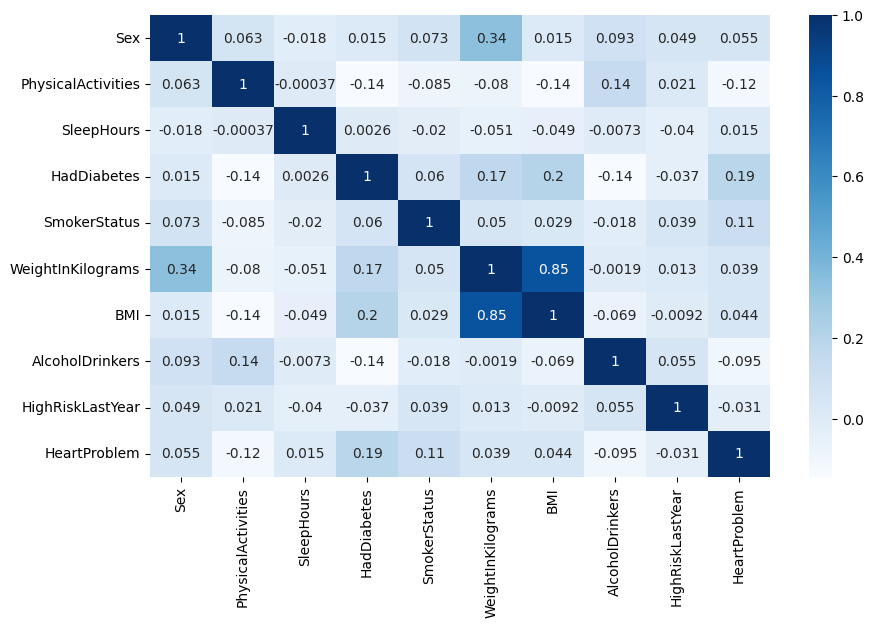

In [16]:
# Selecting numerical columns from the DataFrame
numeric = heart_data.select_dtypes(exclude='O')

# Plotting a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(data=numeric.corr(), annot=True, cmap='Blues')

The initial analysis will utilise a heatmap to explore the relationships between various health factors and heart disease risk. This visual tool will highlight potential connections, such as a positive correlation between high diabetes and BMI, or a negative link between smoking and physical activity. By uncovering these patterns, researchers can gain valuable insights into how different factors work together to influence an individual's susceptibility to heart disease.

**3.2 Impact of Demographic Factors on Heart Disease Risk:**

C:\Users\patel\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


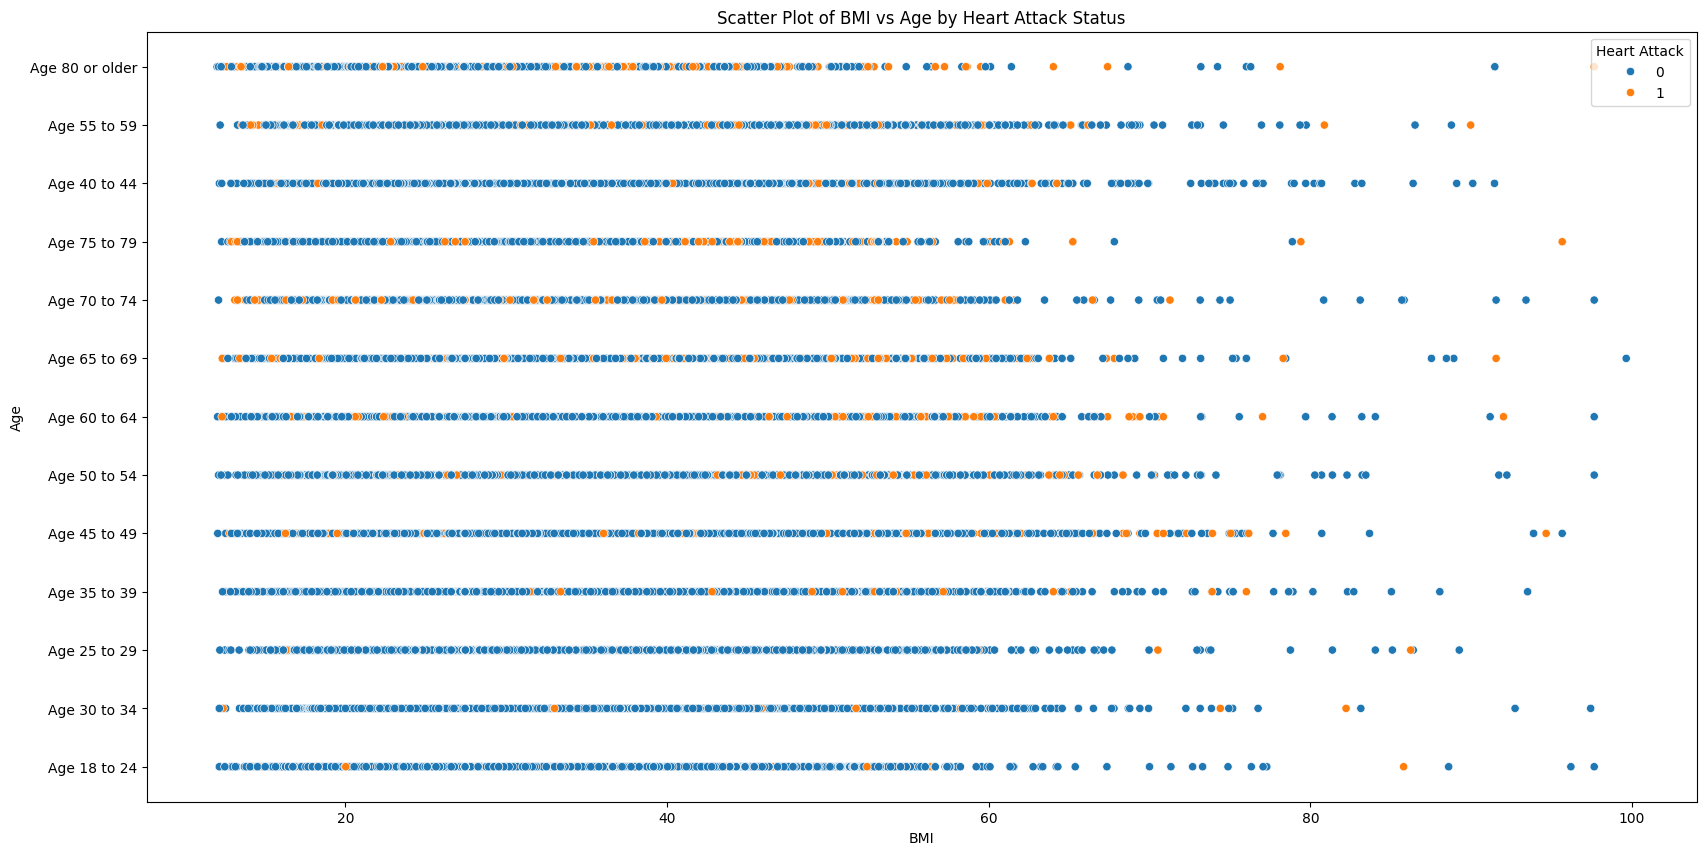

In [19]:
# Creating a scatter plot to visualize the relationship between BMI and AgeCategory with heart attack status
plt.figure(figsize=(20, 10))
sns.scatterplot(data=heart_data, x='BMI', y='AgeCategory', hue='HeartProblem')

# Adding title and axis labels to the plot
plt.title('Scatter Plot of BMI vs Age by Heart Attack Status')
plt.xlabel('BMI')
plt.ylabel('Age')

# Adding legend with title for heart attack status
plt.legend(title='Heart Attack')

# Displaying the plot
plt.show()


The scatter plot shows some correlation between BMI and age and its relation to heart attacks. For example, there is an increasing amount of heart attacks that occur in the 75 and older categories across the entire BMI scale. Interestingly, in the age categories 18-24, 25-29, 30-34, 36-39, there seems to be a very low occurrence of heart attacks even when the BMI increases.

**3.2 Distribution of Heart Disease Cases Among Different Demographic Groups (Count Plot)**

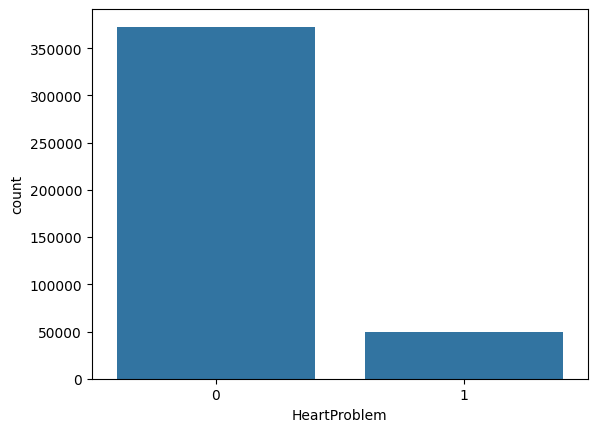

In [106]:
# Creating a count plot to visualize the distribution of heart problem cases
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartProblem', data=heart_data)

# Displaying the plot
plt.show()

This graph illustrates the total number of individuals who are likely to have heart problems. In order to plot the graph, we chose to select a few attributes that were closely related to heart disease. These attributes were HadHeartAttack, HadStroke, and HadAngina. We created a new column in which if the row had one of these attributes set to true or 1, then the value of the column will be set to 1. From the graph, we can see that the majority of the individuals do not have heart disease which means that they did not experience a heart attack, stroke, or angina.

In [17]:
# Selecting categorical columns from the DataFrame
categorical = heart_data.select_dtypes(include='O')

# Extracting column names of categorical variables
categorical.columns


Index(['GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory'], dtype='object')

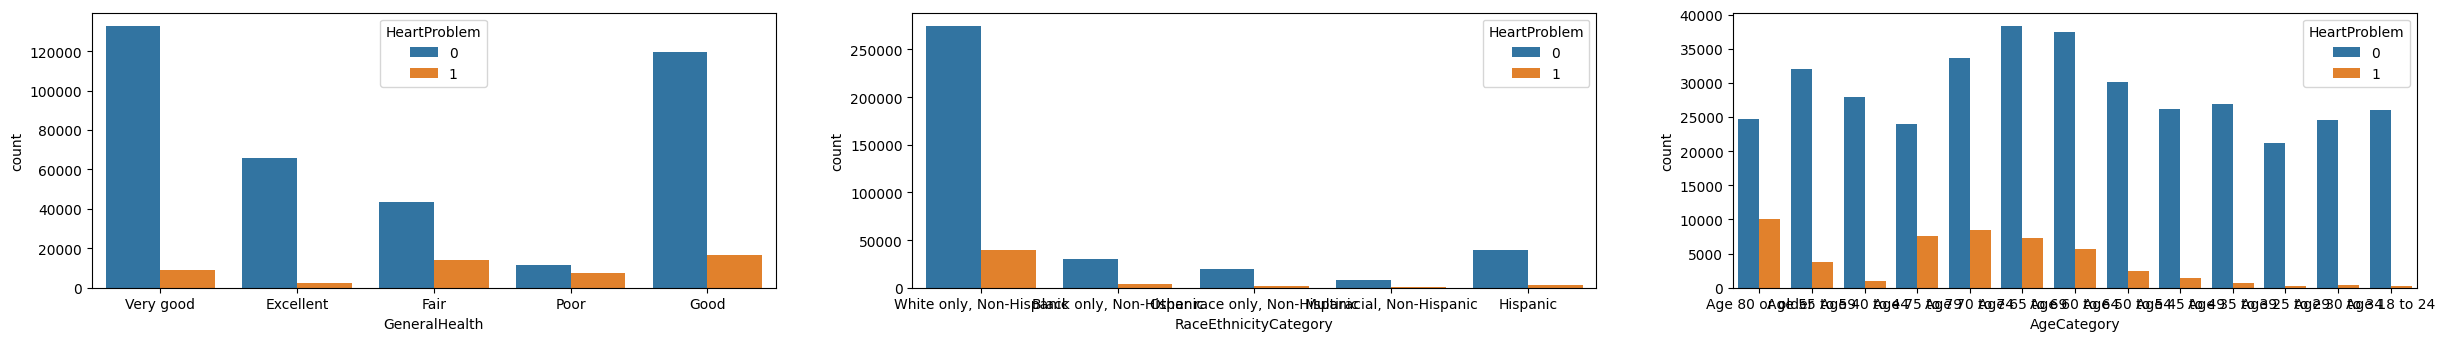

In [18]:
# Initializing a counter variable
i = 1

# Creating a large figure for subplots
plt.figure(figsize=(30, 25))

# Iterating through each categorical feature for plotting
for feature in categorical:
    # Creating subplots with 6 rows and 3 columns, and indexing them sequentially
    plt.subplot(6, 3, i)
    
    # Creating count plots for each categorical feature with heart problem status as hue
    sns.countplot(x=feature, hue='HeartProblem', data=heart_data)
    
    # Incrementing the counter
    i += 1

# **4. Prepare the data for Machine Learning Algorithms:**

In [59]:
from sklearn.calibration import LabelEncoder

# Initialize a LabelEncoder object
le = LabelEncoder()

# Initialize a counter variable
i = 1

# Iterate through each categorical feature
for feature in categorical:
    # Encode the categorical feature using LabelEncoder and replace the original column with encoded values
    heart_data[feature] = le.fit_transform(heart_data[feature])
    
    # Increment the counter
    i += 1
    
    # Print the name of the feature that has been encoded
    print(feature)

GeneralHealth
RaceEthnicityCategory
AgeCategory


In [60]:
# Displaying the data types of columns in the heart_data DataFrame
heart_data.dtypes

Sex                        int64
GeneralHealth              int32
PhysicalActivities       float64
SleepHours               float64
HadDiabetes              float64
SmokerStatus             float64
RaceEthnicityCategory      int32
AgeCategory                int32
WeightInKilograms        float64
BMI                      float64
AlcoholDrinkers          float64
HighRiskLastYear         float64
HeartProblem               int64
dtype: object

### **4.1. Train-test split:**

In [61]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = heart_data.drop('HeartProblem', axis=1)
y = heart_data['HeartProblem']

# Splitting the data into training and testing sets with 80% for training and 20% for testing
# Using stratified sampling to maintain the same distribution of target variable classes in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=heart_data['HeartProblem'])


### **4.2. Scaling:**

In [62]:
from sklearn.discriminant_analysis import StandardScaler

# Initialize a StandardScaler object
ss = StandardScaler()

# Standardize the training data (X_train) by fitting the scaler and transforming the data
X_train = ss.fit_transform(X_train)

# Standardize the testing data (X_test) using the same scaler fitted to the training data
X_test = ss.transform(X_test)

## Logistic Regression:

In [63]:
from sklearn.linear_model import LogisticRegression

# Initialize a LogisticRegression model
log_reg = LogisticRegression()

# Train the LogisticRegression model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [64]:
# Calculate the accuracy of the Logistic Regression model on the training data
acc = log_reg.score(X_train, y_train)
acc

0.8819314761598949

In [65]:
# Use the trained Logistic Regression model to make predictions on the test data
y_pred = log_reg.predict(X_test)


In [66]:
log_reg.coef_,log_reg.intercept_

(array([[ 0.26083068, -0.09185026, -0.17137709, -0.06575863,  0.2598092 ,
          0.22088107,  0.00851624,  1.00910715, -0.05513839,  0.14375563,
         -0.14242335,  0.05839182]]),
 array([-2.52601942]))

In [67]:
# Get the column labels (feature names) of the input data
column_labels = X.columns.tolist()

# Extract the coefficients of the Logistic Regression model and convert to a list
coef = log_reg.coef_.squeeze().tolist()

# Extract the intercept of the Logistic Regression model and convert to a list
intercept = log_reg.intercept_.squeeze().tolist()


In [68]:
# Combine the column labels and coefficients into a list of tuples
labels_coef = list(zip(column_labels, coef))

# Print each feature's coefficient along with the intercept
for i in labels_coef:
    print(i, intercept)

('Sex', 0.26083068107495483) -2.5260194177770043
('GeneralHealth', -0.09185025883886863) -2.5260194177770043
('PhysicalActivities', -0.1713770861493402) -2.5260194177770043
('SleepHours', -0.06575862569543058) -2.5260194177770043
('HadDiabetes', 0.25980920358687026) -2.5260194177770043
('SmokerStatus', 0.22088107316876915) -2.5260194177770043
('RaceEthnicityCategory', 0.008516239578500211) -2.5260194177770043
('AgeCategory', 1.009107152481717) -2.5260194177770043
('WeightInKilograms', -0.05513839447357347) -2.5260194177770043
('BMI', 0.1437556291295832) -2.5260194177770043
('AlcoholDrinkers', -0.14242335346334484) -2.5260194177770043
('HighRiskLastYear', 0.058391818341922086) -2.5260194177770043


In [69]:
# Calculate the accuracy of the Logistic Regression model on the test data
accuracy = log_reg.score(X_test, y_test)
accuracy


0.881834862385321

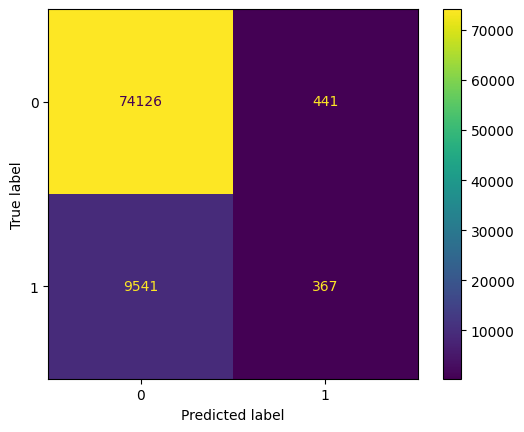

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix for the Logistic Regression predictions on the test data
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object with the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()

Logistic Regression is particularly suitable, for these scenarios as it models the probability of an instance belonging to a class and makes predictions based on a decision boundary. Moreover Logistic Regression is known for its simplicity, interpretability and computational efficiency making it an ideal option, for experimentation and creating baseline models.

In [71]:
from sklearn.metrics import classification_report

# Generate a classification report for the Logistic Regression predictions on the test data
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     74567
           1       0.45      0.04      0.07      9908

    accuracy                           0.88     84475
   macro avg       0.67      0.52      0.50     84475
weighted avg       0.84      0.88      0.84     84475



## Random Forest Classifier:

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a RandomForestClassifier with a random state of 42
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the RandomForestClassifier to the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [75]:
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions using the RandomForestClassifier on the test data
rf_predictions = rf_classifier.predict(X_test)

# Display classification report for the RandomForestClassifier predictions
print(classification_report(y_test, rf_predictions, zero_division=0))

# Calculate and print the accuracy score of the RandomForestClassifier predictions
print("Accuracy Score:", accuracy_score(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     74567
           1       0.37      0.15      0.21      9908

    accuracy                           0.87     84475
   macro avg       0.63      0.56      0.57     84475
weighted avg       0.83      0.87      0.85     84475

0.8702337969813554


<Figure size 800x600 with 0 Axes>

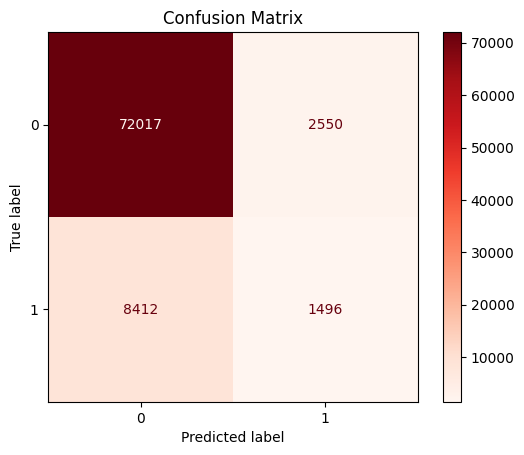

In [76]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Reds', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

## XGBoost Classifier:

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBClassifier with random_state
model = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [92]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8838354542764132


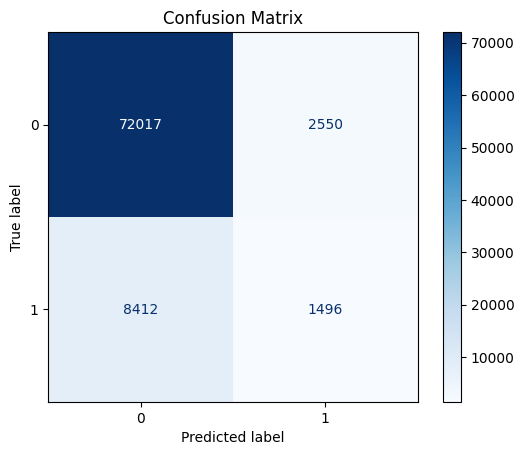

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize ConfusionMatrixDisplay with the confusion matrix and display labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### **Conclusion: Best-Performing Algorithm: XGBoost classifier**

The XGBoost algorithm performed better as it had a higher accuracy than all of the other algorithms. The XGBoost also had a higher precision rate compared to the other algorithms 


In [77]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier


def evaluate_models(X, y):
    results = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('XGBoost', SGDClassifier())
    ]

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append((name, accuracy, precision, recall, f1))

    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='lightblue')
    display(df_styled)

In [ ]:
evaluate_models(X,y)

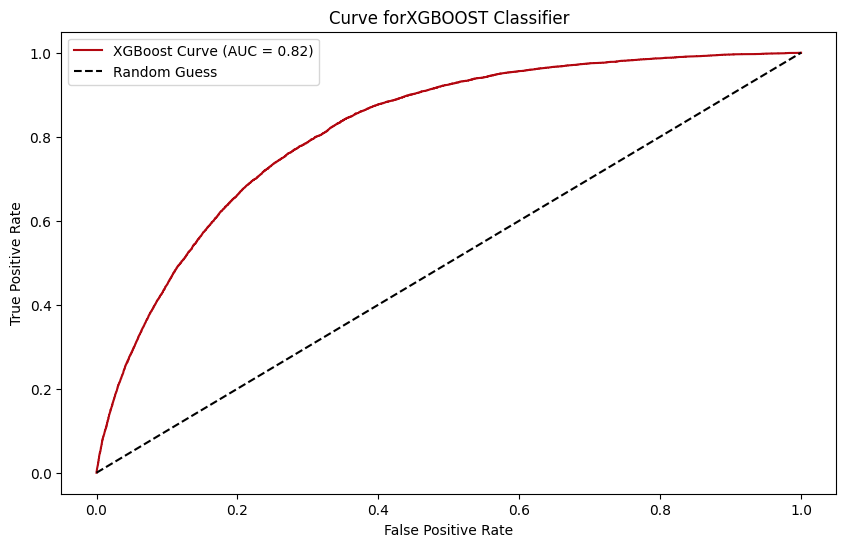

In [98]:
# Graph 1 and small description
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to binary format
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Get predicted probabilities for the positive class
y_scores_rf = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_binary, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='#b20710', label=f'XGBoost Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curve forXGBOOST Classifier')
plt.legend()
plt.show()

The XGBoost curve evaluates the performance of a XGBOOST classifier. It plots the true positive rate against the false positive rate at varying thresholds. The red XGBOOST curve significantly outperforms the random guess (black diagonal) line with an AUC of 82%. This AUC demonstrates the XGBoost model's effectiveness at minimizing false positives and detecting true positives.

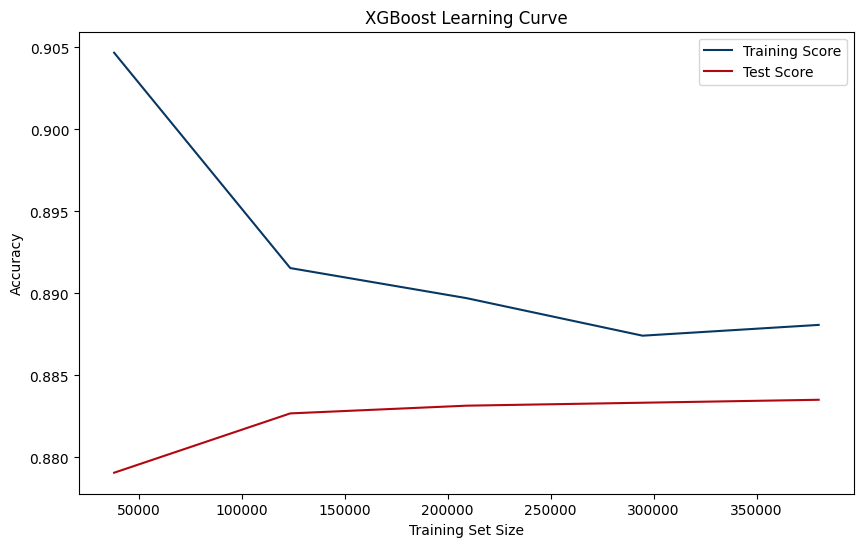

In [97]:
# Graph 2 and small description
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color = "#073763")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score', color = "#b20710")
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.show()

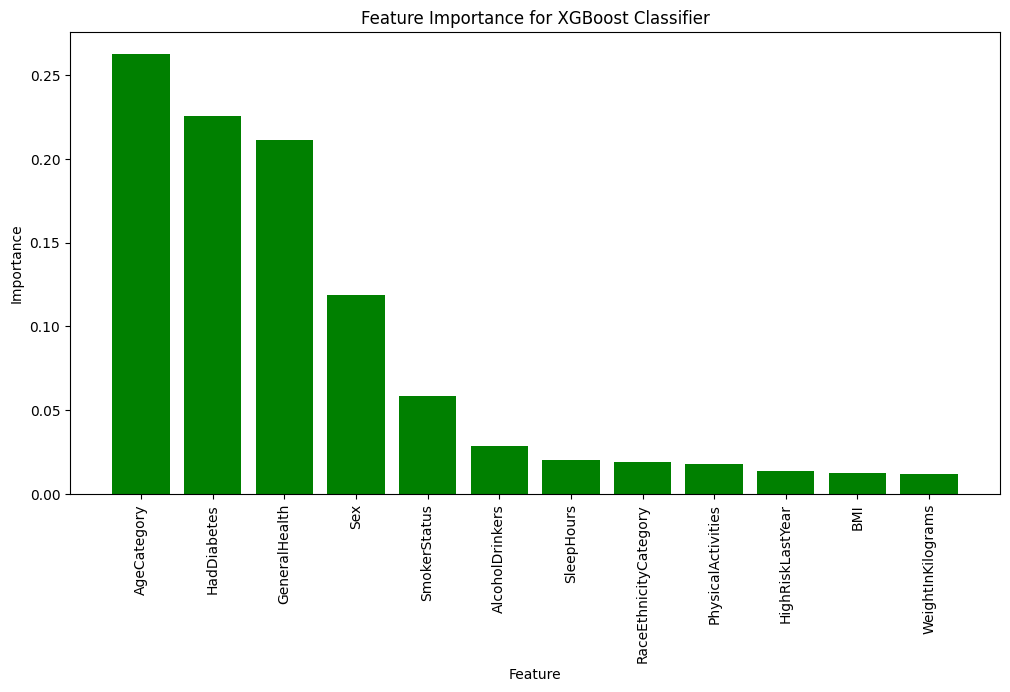

In [96]:
# Graph 3 and small description

features = X.columns
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center', color='Green')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for XGBoost Classifier')
plt.show()

This bar graph visualizes the relative significance of various factors in predicting a specific outcome using an XGBoost classifier model. Each bar represents a feature, with its height corresponding to its importance score. The higher the bar, the greater the influence that particular feature has on the model's predictions. Interestingly, "AgeCategory" appears as the most crucial factor across all the classifications, suggesting a strong correlation between diabetes Age and the predicted outcome.